In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [51]:
# Abrir imagen
img = cv2.imread('gray.jpeg') 

# Convertir a escala de grises
escala_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


In [52]:
u, s, v, = np.linalg.svd(escala_grises, full_matrices=True)

Varianza explicada de los primeros 20 vectores:
[9.25748e-01 2.71770e-02 1.08660e-02 5.07500e-03 4.80400e-03 3.63100e-03
 3.38100e-03 2.45300e-03 1.81400e-03 1.42600e-03 1.36900e-03 1.09000e-03
 7.34000e-04 6.61000e-04 5.74000e-04 5.32000e-04 4.87000e-04 4.25000e-04
 3.47000e-04 3.25000e-04]


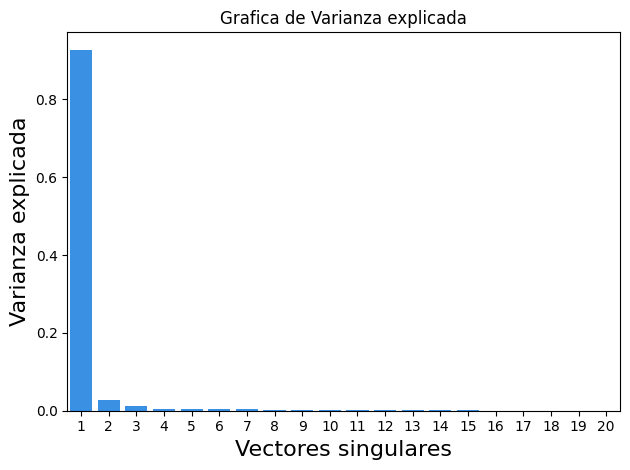

In [53]:
# import module 
import seaborn as sns 
  
var_explicada = np.round(s**2/np.sum(s**2), decimals=6) 
  
print(f'Varianza explicada de los primeros 20 vectores:\n{var_explicada[0:20]}') 
  
sns.barplot(x=list(range(1, 21)), 
            y=var_explicada[0:20], color="dodgerblue") 
  
plt.title('Grafica de Varianza explicada') 
plt.xlabel('Vectores singulares', fontsize=16) 
plt.ylabel('Varianza explicada', fontsize=16) 
plt.tight_layout() 
plt.show() 

La matriz inicial nos presenta cuando porcentaje de la información contiene el n-ésimo vector y la gráfica nos muestra los 20 vectores singulares que contienen la mayor información con sus respectivos valores singulares.

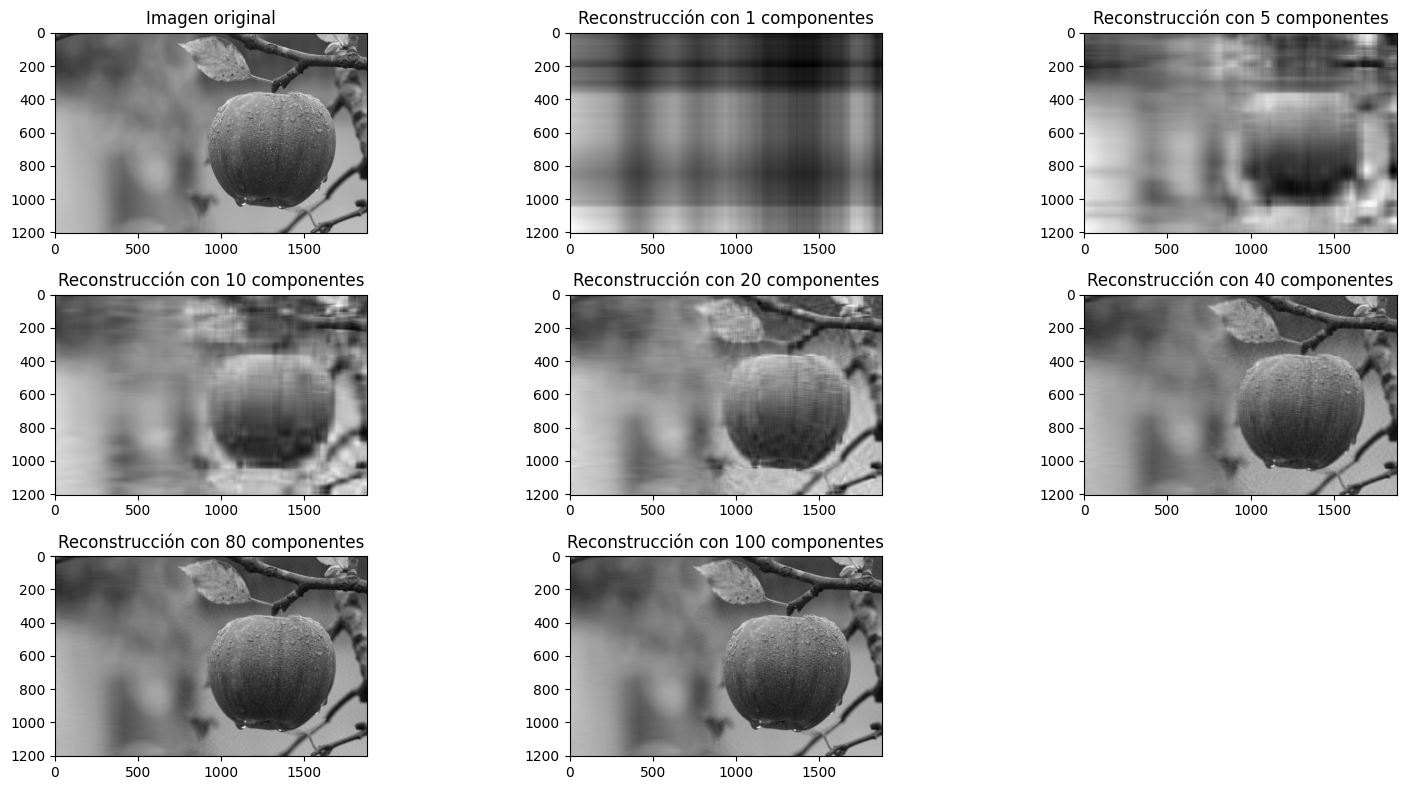

In [54]:
n, m = escala_grises.shape
componentes = [min(n, m), 1, 5, 10, 20, 40, 80, 100]
plt.figure(figsize=(16, 8))

for i in range(len(componentes)):
    rango_reducido = u[:, :componentes[i]] @ np.diag(s[:componentes[i]]) @ v[:componentes[i], :]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(rango_reducido, cmap='gray')
    if i == 0:
        plt.title(f'Imagen original')
    else:
        plt.title(f'Reconstrucción con {componentes[i]} componentes')

plt.tight_layout()
plt.show()

    

Con 5 componentes ya es posible discernir la silueta de la imagen y conforme se aumentan la cantidad de componentes (vectores), la imagen va siendo cada vez mas clara, con 40 aun se ve un poco difusa, pero al tener 80 y 100 la diferencia con la imagen original es casi nula.

Lo siguiente es para reconstruir las imagenes a color, esto creando 3 matrices distintas para el rojo, verde y azul y haciendo sus analisis separados para después hacer la unión de las 3 matrices.

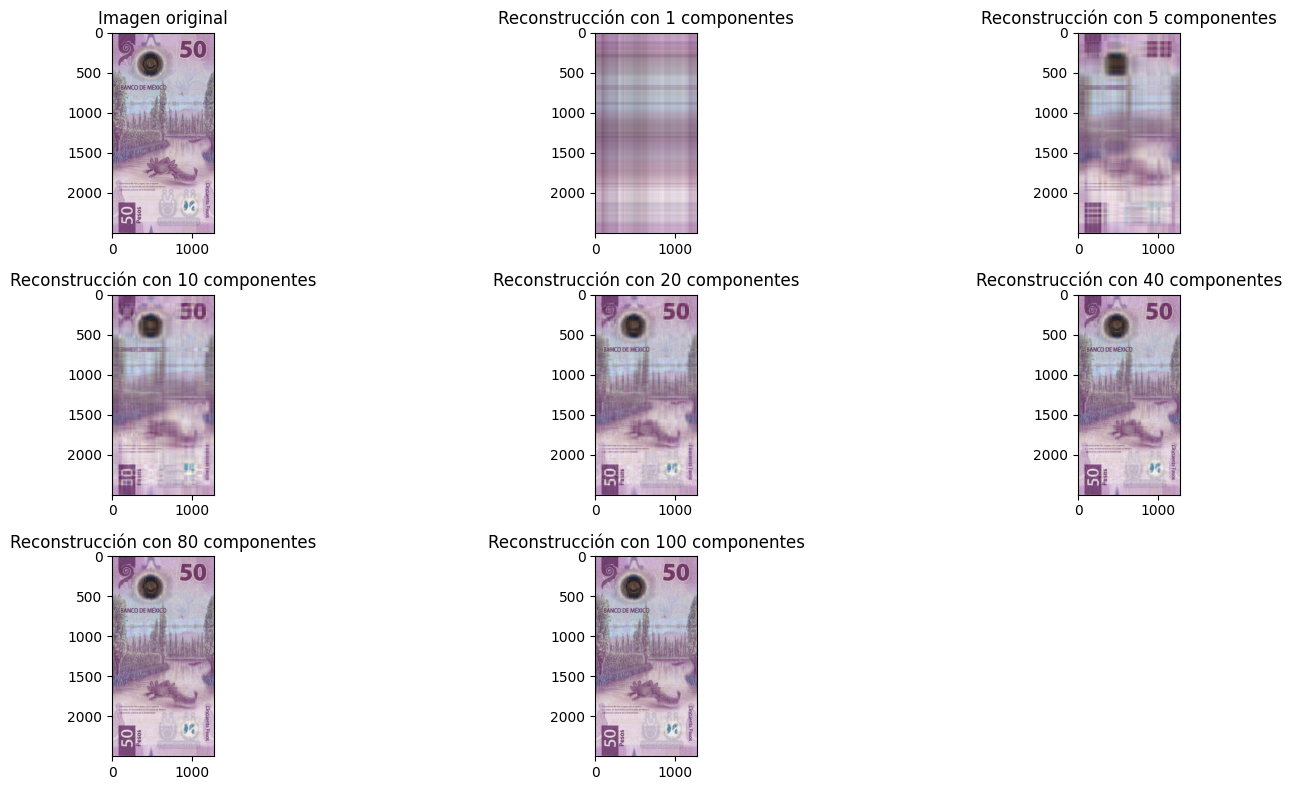

In [ ]:
img = cv2.imread('Ajolopesos.jpg') 

n, m, _ = img.shape

plt.figure(figsize=(16, 8))

# Separar los canales de color (R, G, B)
canales = cv2.split(img)
reconstrucciones = []

# Procesar cada canal 
for canal in canales:
    u, s, v = np.linalg.svd(canal, full_matrices=False)
    reconstruccion_canal = []
    for c in componentes:
        rango_reducido = u[:, :c] @ np.diag(s[:c]) @ v[:c, :]
        reconstruccion_canal.append(rango_reducido)
    reconstrucciones.append(reconstruccion_canal)

# Reconstrucción de la imagen
for i, c in enumerate(componentes):
    # Combinamos los canales reconstruidos para cada número de componentes
    img_reconstruida = cv2.merge([
        reconstrucciones[0][i],
        reconstrucciones[1][i],
        reconstrucciones[2][i]
    ])

    img_reconstruida = np.clip(img_reconstruida, 0, 255).astype(np.uint8)  # Aseguramos valores válidos para imágenes
    
    # Mostrar la imagen reconstruida
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_reconstruida) 
    if i == 0:
        plt.title(f'Imagen original')
    else:
        plt.title(f'Reconstrucción con {c} componentes')

plt.tight_layout()
plt.show()
